# Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Read in Data

In [21]:
# Set working directory
%cd C:/Users/sriha/OneDrive/Desktop/DS/My work/life-expectancy

# Unpickle preprocessed training data
X_train = pd.read_pickle('Data/X_train_clean.pkl')

# Unpickle train target variable
y_train = pd.read_pickle('Data/y_train.pkl')

C:\Users\sriha\OneDrive\Desktop\DS\My work\life-expectancy


In [25]:
# Combine X and y for visualization and to determine correlations
df_train = X_train.join(y_train)
df_train

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,under-five deaths,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
647,Croatia,2009,Developed,19.0,9.0,12.21,2160.380199,97.0,2,10.0,...,8.18,96.0,0.1,14157.144160,442978.0,1.7,1.6,0.803,14.20,76.3
1174,Iceland,2011,Developed,51.0,8.0,8.13,7.048093,93.0,0,9.5,...,8.65,95.0,0.1,46.217000,31914.0,0.9,0.9,0.894,18.60,82.1
234,Belarus,2005,Developing,252.0,1.0,11.01,45.650078,99.0,1,1.0,...,6.89,99.0,0.1,3126.717670,9663915.0,2.3,2.5,0.713,14.40,68.1
2789,United Republic of Tanzania,2004,Developing,454.0,100.0,3.81,0.000000,95.0,1419,154.0,...,4.10,95.0,10.8,1360.094916,1239196.0,7.8,7.8,0.649,12.05,51.5
2281,Seychelles,2015,Developing,168.0,7.0,7.41,0.000000,98.0,0,8.0,...,3.73,97.0,0.1,1539.464000,93419.0,5.7,6.0,0.781,14.10,73.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117,Guyana,2004,Developing,237.0,1.0,7.84,1.776181,91.0,0,1.0,...,5.73,91.0,1.9,145.588610,751652.0,5.8,5.6,0.613,11.20,65.1
594,Comoros,2013,Developing,233.0,1.0,0.01,61.574436,88.0,0,2.0,...,6.51,87.0,0.8,834.341949,7415.0,6.8,6.6,0.490,10.90,62.9
318,Bolivia (Plurinational State of),2001,Developing,238.0,14.0,2.20,0.000000,77.0,0,19.0,...,6.31,71.0,0.1,1417.265820,1352219.0,1.5,1.4,0.607,13.70,63.3
2263,Senegal,2001,Developing,251.0,26.0,0.34,6.064221,89.0,24789,49.0,...,4.98,52.0,0.6,481.287397,1134497.0,12.1,12.1,0.381,5.40,57.9


# Define Function to Visualize Data

In [43]:
def plot_feature(data, column):
  '''
  Make plots for 'column'
  Left: Distribution of feature
  Right: Dependance of sale price on the feature
  '''
  sns.set_style('whitegrid')
  plt.figure(figsize = (16, 6))
  plt.subplot(1, 2, 1)

  order = data.groupby(by=[column])['Life expectancy '].mean().sort_values().index

  if data[column].dtype == 'int64' or data[column].dtype == 'float64':
    sns.distplot(data[column])
  else:
    sns.countplot(x=column, 
                  data=data,
                  order=order) 

  plt.xlabel(column, fontsize=14)
  plt.xticks(rotation=0, fontsize=12)
  plt.ylabel('Count', fontsize=14)

  
  plt.subplot(1, 2, 2)

  if data[column].dtype == 'int64' or data[column].dtype == 'float64':
    sns.regplot(x=column, 
                y='Life expectancy ', 
                data=data,
                scatter_kws={'alpha':0.2})
  else:
    sns.boxplot(x = column,
                y = 'Life expectancy ', 
                data=data,
                order = order)

  plt.xlabel(column, fontsize=14)
  plt.xticks(rotation=0, fontsize=12)
  plt.ylabel('Life expectancy ', fontsize=14)
  plt.subplots_adjust(wspace=.4)
  plt.show()


def heatmap(corr_matrix):
  sns.clustermap(corr_matrix,
                 annot=False,
                 cmap='Blues')
  plt.show()

# Visualizations and Observations

### 1. Some expected trends:

- Life expectancy is _inversely correlated_ with **adult mortality**, **infant mortality**, **under-five deaths**, as well as **incidence of HIV/AIDS and measles**.

- **Thinness in children and teenagers** is also _inversely correlated_ with life expectancy. This also tells us that thinness here could indicate lack of access to adequate nutrtion. 

- Life expectancy is _directly corelated_, to varying degrees, with **expenditure on healthcare**, **GDP**, **level of schooling** and **immunization against hepatitis B, polio and diptheria**. 

- Life expectancy tends to be _higher_ in developed countries. 


### 2. An unexpected result:

- Life expectancy is _directly correlated_ (albeit very weakly) with **net alcohol consumption per capita**. The expectation would be that alcohol consumption reduces life expectancy, but maybe there is more to it than a simple correlation. 

### 3. Correlations:

- Many of the features only seem to be _weakly_ correlated to the _target variable_. This gives us a starting point to decide whether to later drop some of these features.

- On the other hand, some features are very _strongly_ correlated with _each other_. These will need to be accounted for to avoid multicollinearity. 


### 4. Observations on frequency distributions:

- Several features are skewed. Since we aim for minimum skew and a normal distribution we will attempt to normalize these features. 

- Features with left-skew: **'Hepatits B'**, **'Polio'**, **'Diptheria'**

- Features with right-skew: **'Adult mortality'**, **'Infant deaths**', **'Under-Five deaths'**, **'Alcohol'**, **'Percentage expediture'**, **'Measles'**, **'HIV/AIDS'**, **'GDP'**, **'Thinness 1-19'**, **'Thinness 5-9'**.

- All the skewed features will need to be normalized before proceeding. 
 
- **Note:** The target feature 'Life expectancy' also has a slight skew, and we may choose to normalize this. This will have to be reversed before the final predictions are made. 

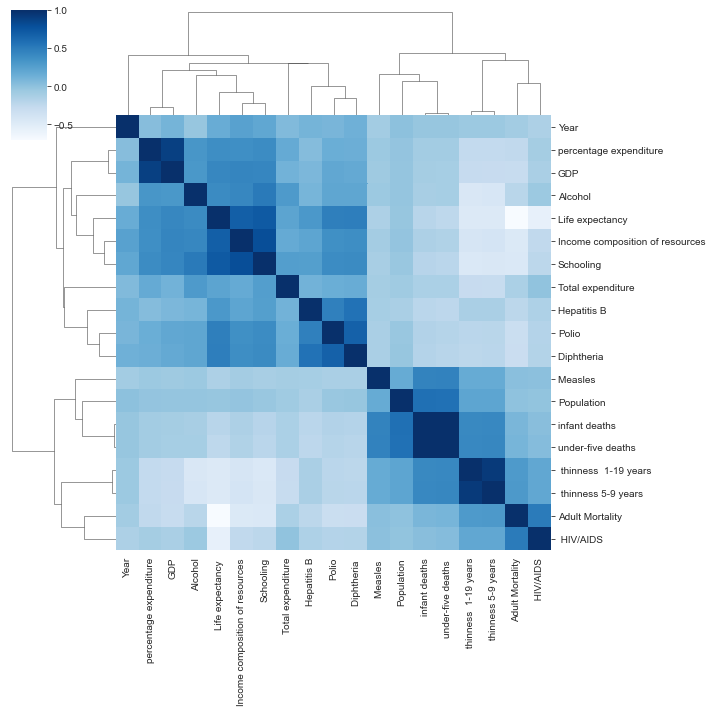

In [44]:
corr1 = df_train.corr()
heatmap(corr1)

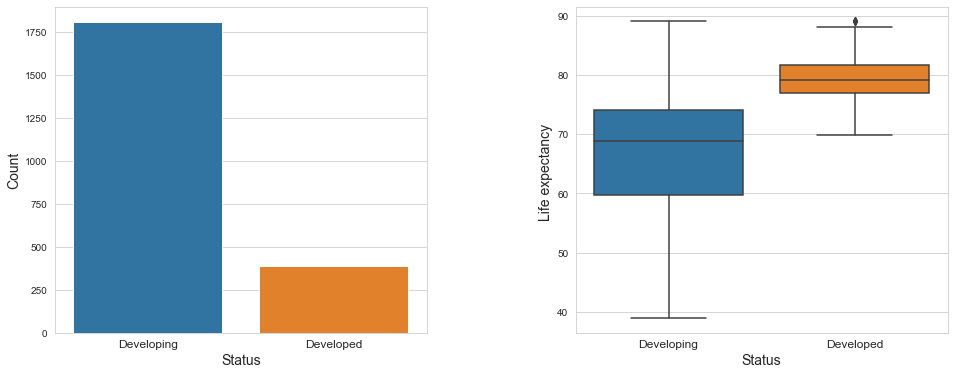

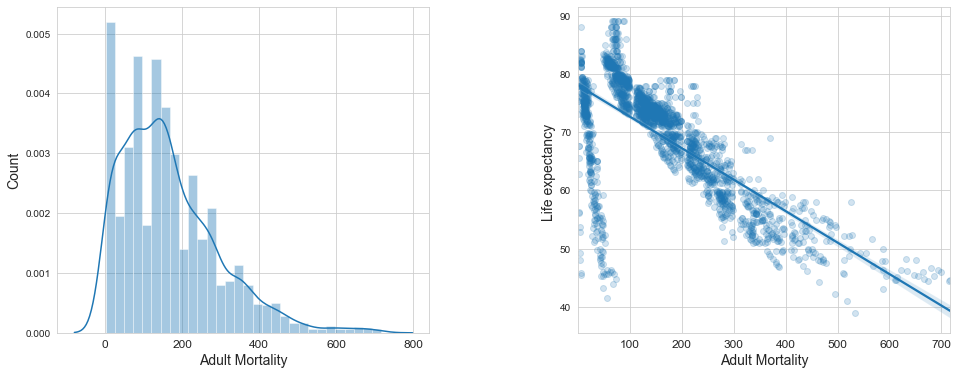

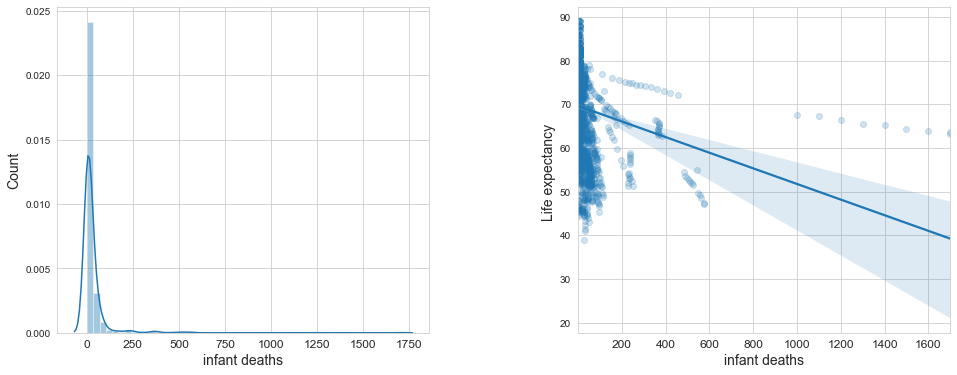

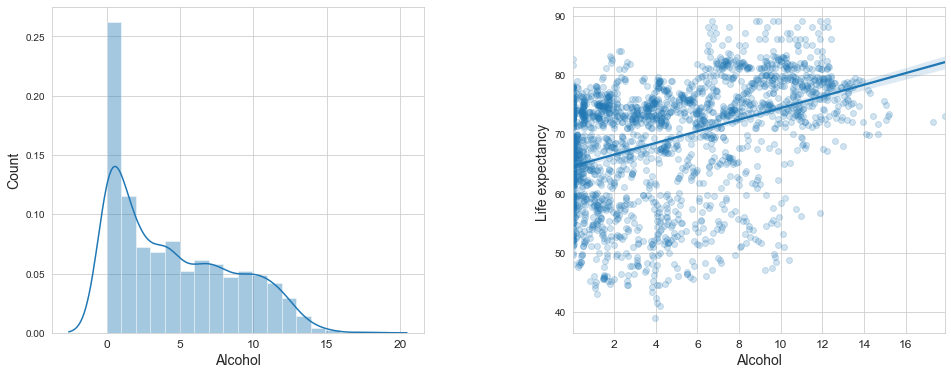

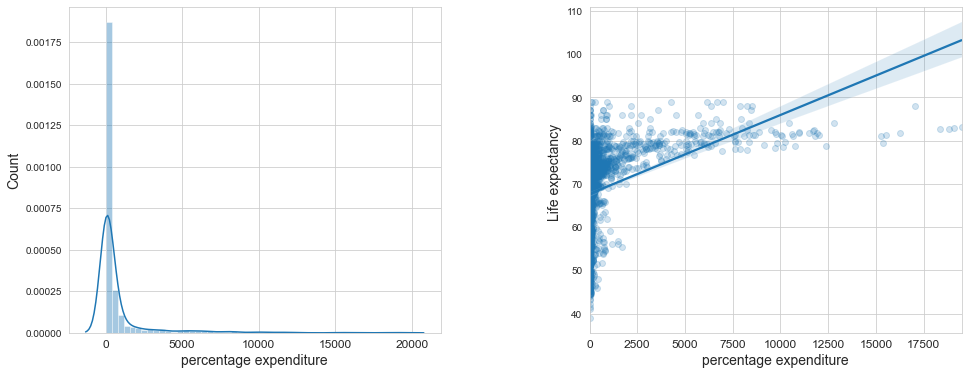

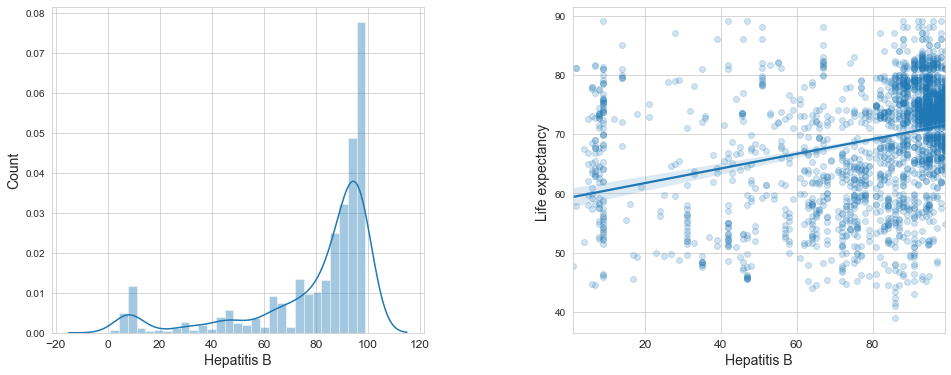

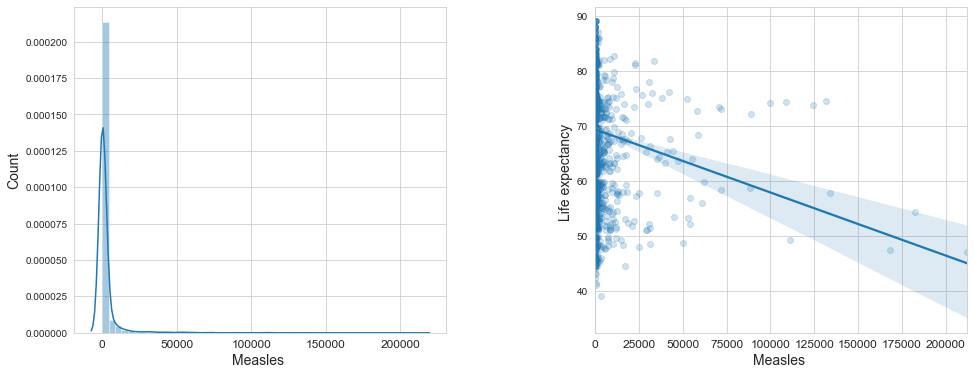

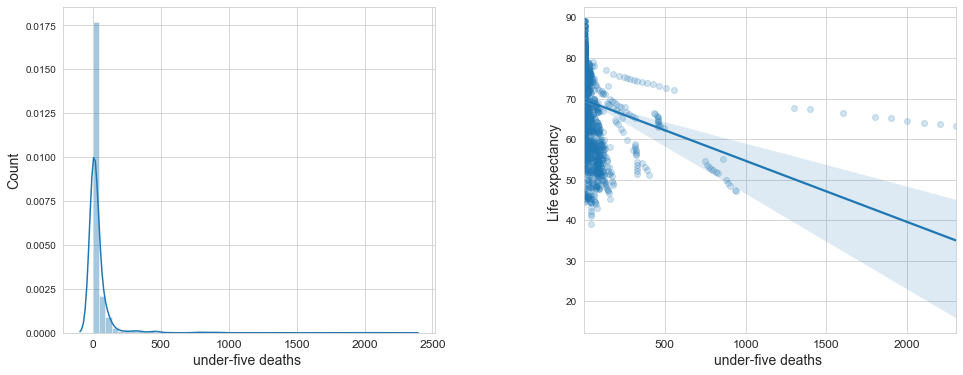

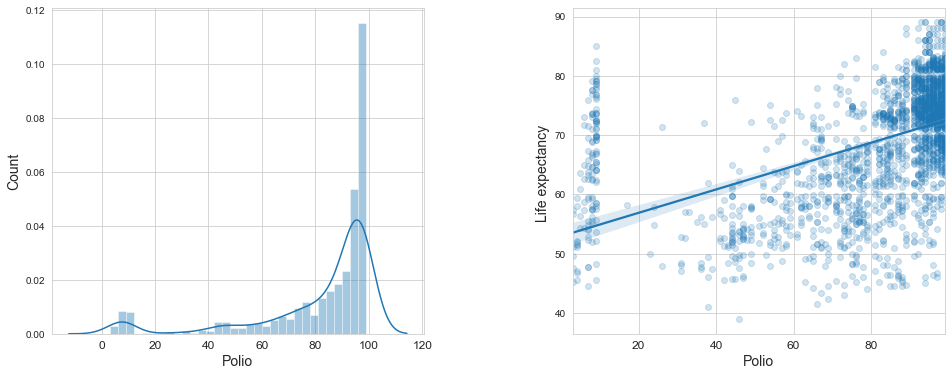

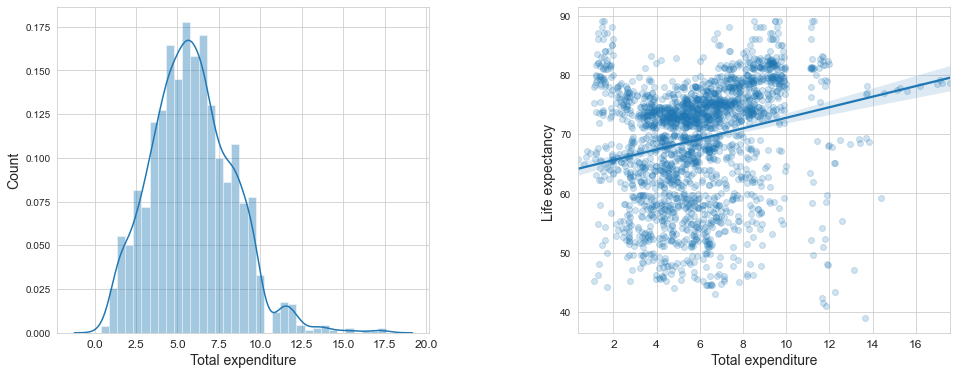

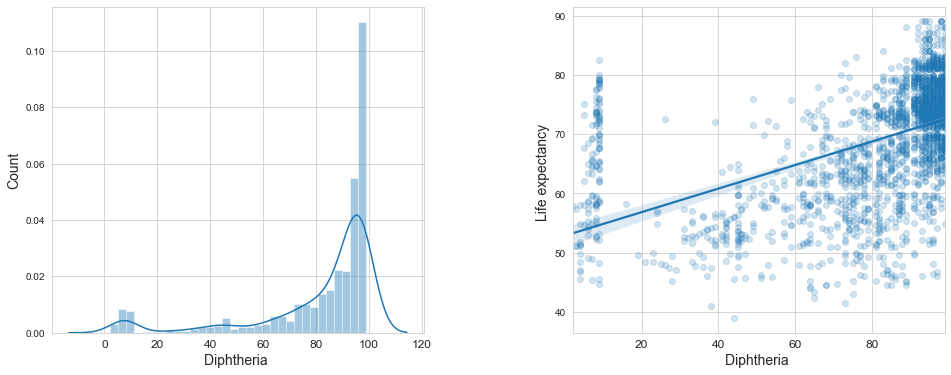

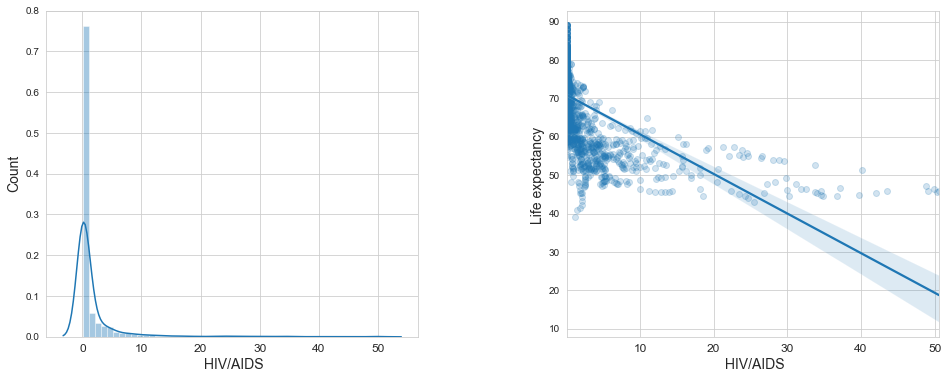

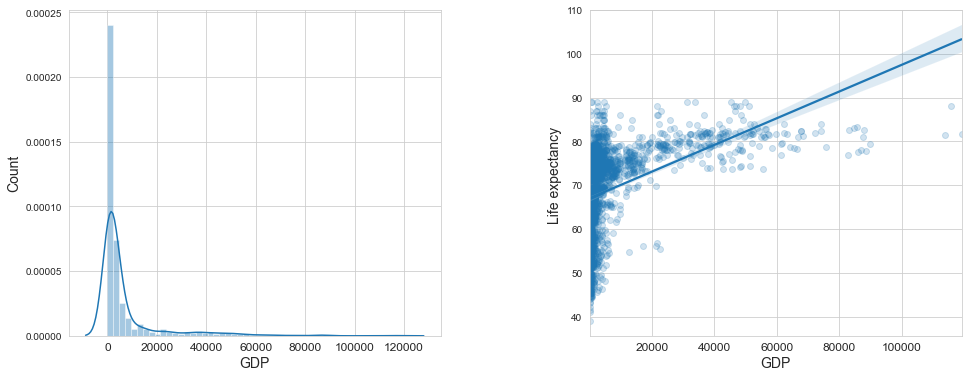

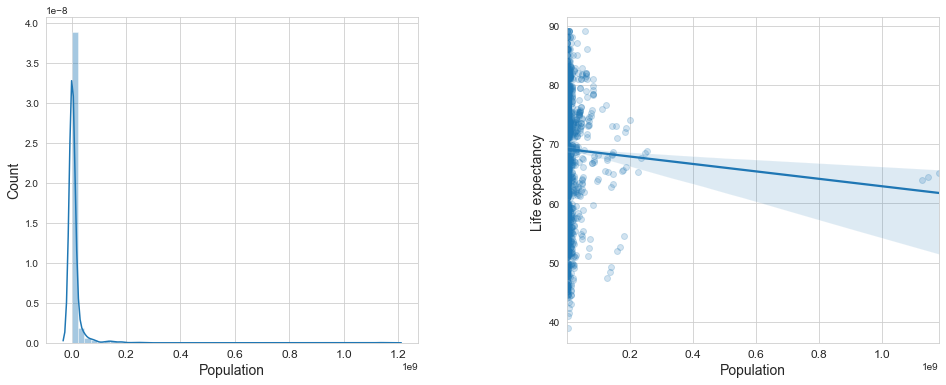

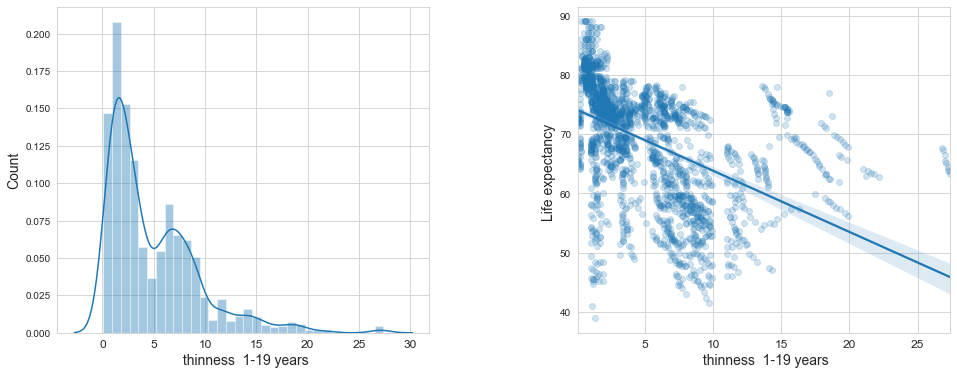

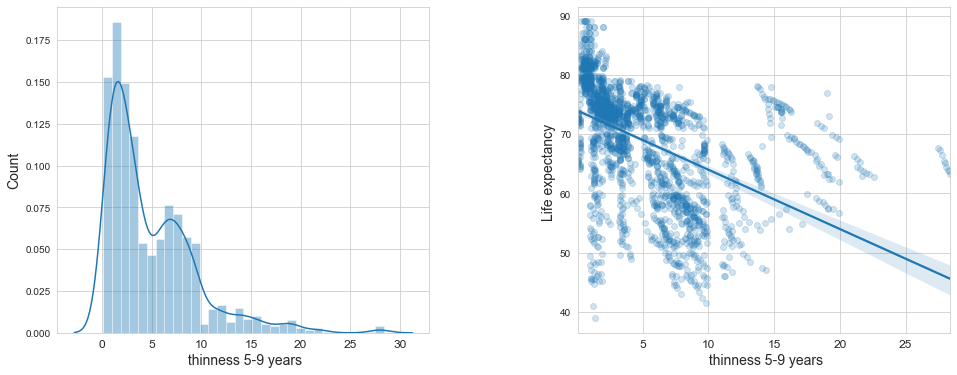

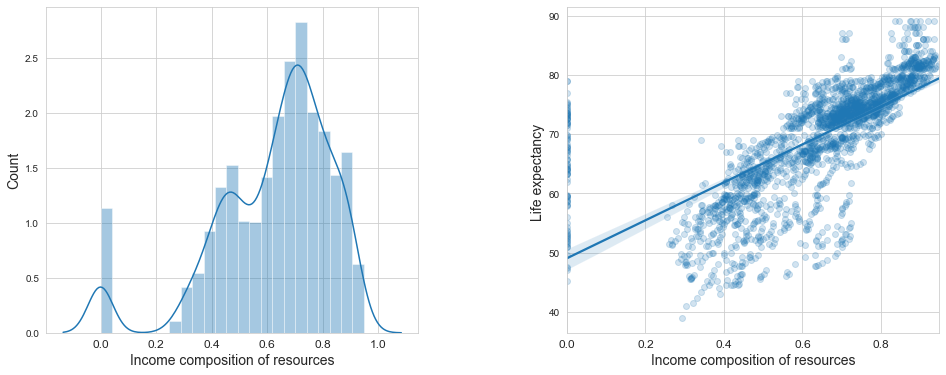

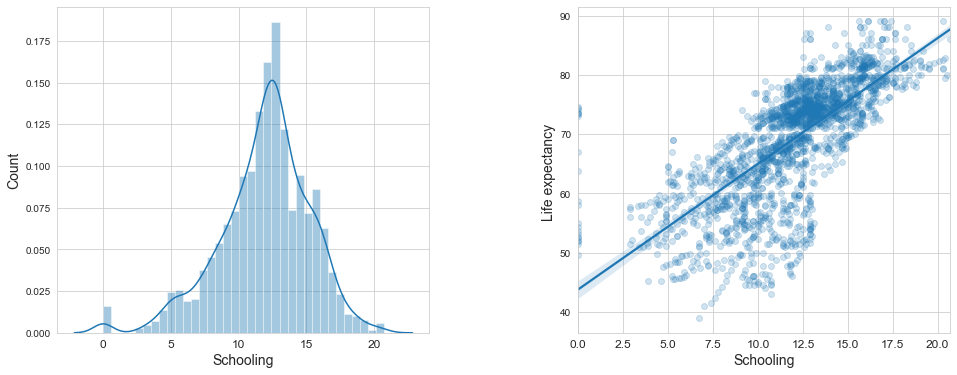

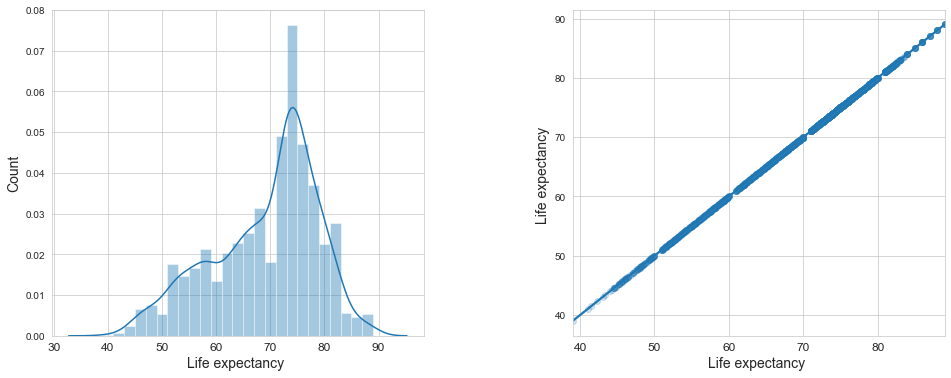

In [41]:
for column in df_train.columns[2:]:#len(df_train.columns)-1]:
    plot_feature(df_train, column)